# Task and project estimation with monaco

Brownbag 13-03-2020

In [47]:
from monaco import Task, Project
import seaborn as sns

# Task example 1

In [65]:
t1 = Task(name='Analysis', min=2, median=3, max=7, estimator='uniform')

In [66]:
t1.estimate()

5.1320088270155555

In [67]:
[t1.estimate() for i in range(10)]

[6.47226596506382,
 2.797361966677669,
 4.499495454619673,
 6.102306096677262,
 4.390383214387462,
 4.25004661904439,
 6.1458239878156,
 3.059876689234124,
 6.975293927561882,
 2.0941576107415147]

In [68]:
t1_estimates = [t1.estimate() for i in range(1000)]

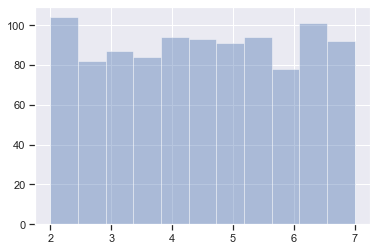

In [69]:
sns.distplot(t1_estimates, hist=True, kde=False)

# Task example 2

In [75]:
t2 = Task(name='Experiment', min=20, median=35, max=60, estimator='triangular')

In [76]:
t2.estimate()

39.678442533472236

In [77]:
[t2.estimate() for i in range(10)]

[51.32160684825675,
 27.435105989168118,
 36.853835315214994,
 42.20703470852492,
 30.762805251643233,
 23.828904533100445,
 34.33902669762675,
 43.033151643841094,
 23.865700186233983,
 23.147295686347444]

In [82]:
t2_estimates = [t2.estimate() for i in range(1000)]

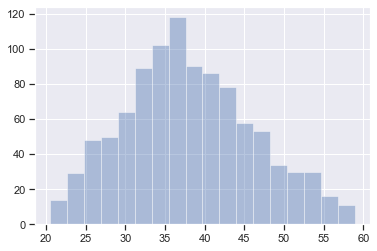

In [83]:
sns.distplot(t2_estimates, hist=True, kde=False)

# Project estimation

In [39]:
p = Project(name='High Score Bypass')

In [40]:
p.add_task(t1)
p.add_task(t2)

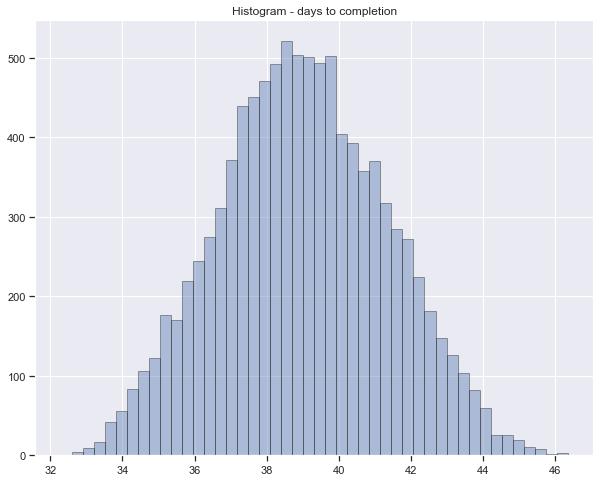

In [41]:
plot_data = p.plot(n=10000)

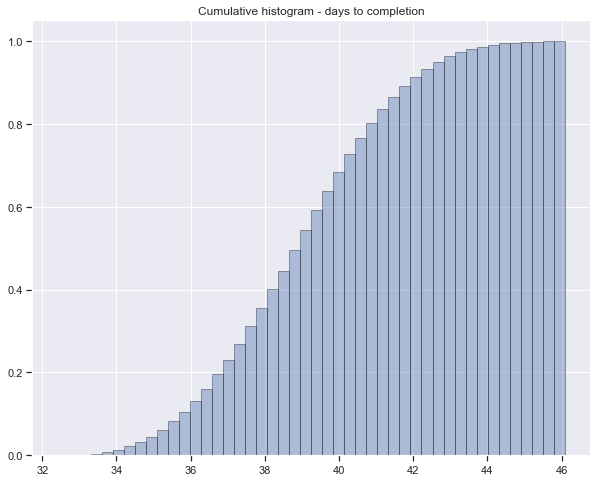

In [42]:
plot_data = p.plot(n=10000, hist=False)